# Relevance Vector Machine - Regression

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from RVM import RVM

## 1) Linear dataset

In [16]:
# Number of samples.
N = 50

X = np.linspace(0,10,N)
Y = 2*X
T = Y + np.random.randn(N)

X = X.reshape(N,1)

# Just to be safe.
Y = None

print('X shape:', X.shape)
print('T shape:', T.shape)

X shape: (50, 1)
T shape: (50,)


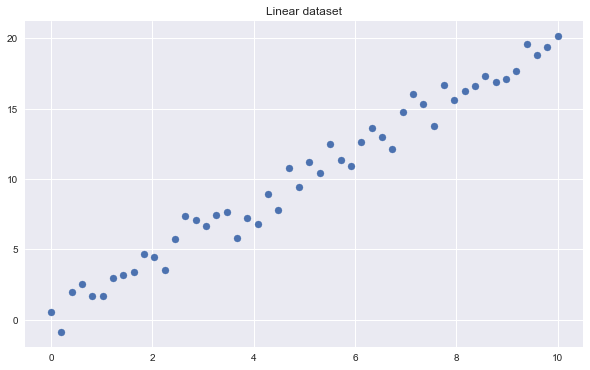

In [17]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.scatter(X, T)
plt.title('Linear dataset')
plt.show()

In [18]:
rvm = RVM()

rvm.fit(X,T)

X_test = np.linspace(-10,10,2*N)
X_test = X_test.reshape(2*N,1)
y_pred, sigma = rvm.predict(X_test)

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

print('Number of relevance vectors:', relevance_vect.shape[0])

Number of relevance vectors: 3


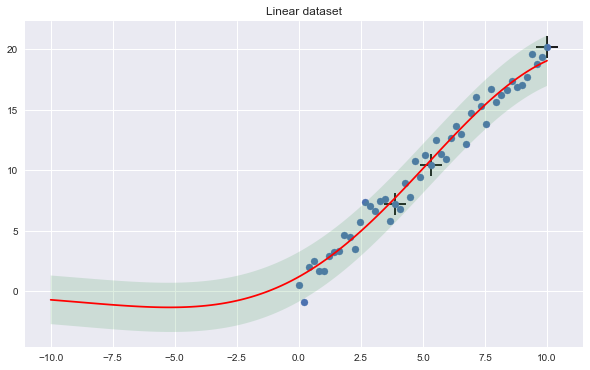

In [19]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X_test, y_pred,c='r')
plt.scatter(relevance_vect, T[indexes_relev_vect], c='black', marker='+', s=500)
plt.scatter(X, T)
plt.fill_between(X_test.flatten(), y_pred - 2*np.sqrt(np.diag(sigma)), y_pred + 2*np.sqrt(np.diag(sigma)), alpha=0.2)
plt.title('Linear dataset')
plt.show()

## 2) Sinus cardinal dataset

# Without noise

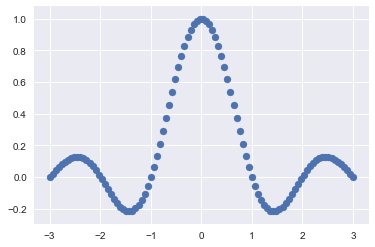

In [69]:
N = 100

X = np.linspace(-3,3,N)
Y = np.sinc(X)
T = Y #+ np.random.randn(N) * 0.01**2

X = X.reshape(N,1)

# Safe.
Y = None

sns.set(style="darkgrid")
plt.scatter(X, T)
plt.show()

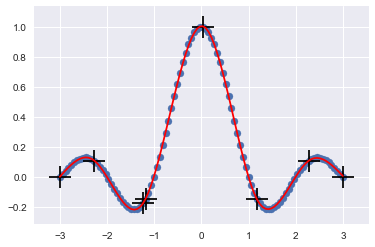

In [70]:
rvm = RVM(kernel='linear_spline', threshold_alpha=1e9, alpha=1e-15, sigma=0.001)

rvm.fit(X,T)

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

y_pred, sigma = rvm.predict(X)

sns.set(style="darkgrid")
plt.plot(X, y_pred, c='r')
plt.scatter(X, T)
plt.scatter(relevance_vect, T[indexes_relev_vect], c='black', marker='+', s=500)
#plt.fill_between(X.flatten(), y_pred - 2*np.sqrt(np.diag(sigma)), y_pred + 2*np.sqrt(np.diag(sigma)), alpha=0.2)
plt.show()


# With noise

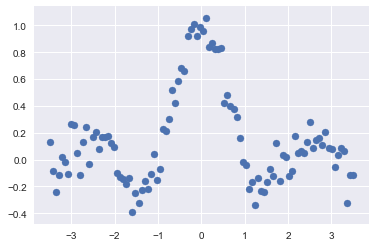

In [89]:
N = 100

X = np.linspace(-3.5,3.5,N)
Y = np.sinc(X)
T = Y + np.random.randn(N) * 0.1

X = X.reshape(N,1)

# Safe.
#Y = None

sns.set(style="darkgrid")
plt.scatter(X, T)
plt.show()

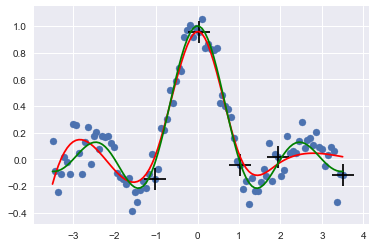

In [90]:
rvm = RVM(kernel='linear_spline', threshold_alpha=1e9, alpha=1e-5, sigma=0.1)

rvm.fit(X,T)

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

y_pred, sigma = rvm.predict(X)

sns.set(style="darkgrid")
plt.plot(X, y_pred, c='r')
plt.scatter(X, T)
plt.scatter(relevance_vect, T[indexes_relev_vect], c='black', marker='+', s=500)
#plt.fill_between(X.flatten(), y_pred - 2*np.sqrt(np.diag(sigma)), y_pred + 2*np.sqrt(np.diag(sigma)), alpha=0.2)
plt.plot(X, Y, c='g')
plt.show()
